In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [3]:
# import zipfile

# with zipfile.ZipFile("titanic.zip", "r") as zip_ref:
#     zip_ref.extractall("titanic_data")  # Extracts files to "titanic_data" folder


In [4]:
for dirname, _, filenames in os.walk('titanic_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

titanic_data\gender_submission.csv
titanic_data\test.csv
titanic_data\train.csv


In [5]:
train_data = pd.read_csv("titanic_data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv("titanic_data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_women = sum(women)/len(women)
rate_men = sum(men)/len(men)
print("% of women who survived:", rate_women*100)
print("% of men who survived:", rate_men*100)

% of women who survived: 74.20382165605095
% of men who survived: 18.890814558058924


In [7]:
train_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
test_data.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [9]:
train_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
test_data.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [10]:
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
train_data["Embarked"].fillna(train_data["Embarked"].mode(), inplace=True)

test_data["Age"].fillna(test_data["Age"].median(), inplace=True)
test_data["Embarked"].fillna(test_data["Embarked"].mode(), inplace=True)

C:\Users\hiami\AppData\Local\Temp\ipykernel_10996\1925862937.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
C:\Users\hiami\AppData\Local\Temp\ipykernel_10996\1925862937.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [11]:
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1  # +1 includes the passenger
train_data.drop(["SibSp", "Parch"], axis=1, inplace=True)

test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1  # +1 includes the passenger
test_data.drop(["SibSp", "Parch"], axis=1, inplace=True)

In [12]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [13]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,892,3,male,34.5,7.8292,Q,1
1,893,3,female,47.0,7.0000,S,2
2,894,2,male,62.0,9.6875,Q,1
3,895,3,male,27.0,8.6625,S,1
4,896,3,female,22.0,12.2875,S,3


In [14]:
features = ["Pclass", "Sex", "Embarked",]
train_data = pd.get_dummies(train_data, columns=features, drop_first=True)
test_data = pd.get_dummies(test_data, columns=features, drop_first=True)

In [17]:
scaler = StandardScaler()
train_data[["Age", "Fare"]] = scaler.fit_transform(train_data[["Age", "Fare"]])
test_data[["Age", "Fare"]] = scaler.fit_transform(test_data[["Age", "Fare"]])

In [18]:
train_data.head()

,Survived,Age,Fare,FamilySize,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,-0.565736,-0.502445,2,False,True,True,False,True
1,1,0.663861,0.786845,2,False,False,False,False,False
2,1,-0.258337,-0.488854,1,False,True,False,False,True
3,1,0.433312,0.420730,2,False,False,False,False,True
4,0,0.433312,-0.486337,1,False,True,True,False,True


In [19]:
# X_test = test_data

In [20]:
# correlation_matrix =train_dataX.corr()
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Feature Correlation with Survived")
# plt.show()

In [21]:
X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

((712, 8), (179, 8))

Trying Pipeline with Logistic Regression

In [23]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Lasso (L1) or Ridge (L2)
    'solver': ['liblinear', 'saga'],  # Supports L1 & L2
    'class_weight' : [None, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True)

In [24]:
model = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2)
model.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END C=0.001, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, class_weight=None, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, class_weight=None, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, class_weight=None, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, class_weight=None, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, class_weight=None, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, class_weight=None, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001,

C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\s

[CV] END C=1, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1, class_weight=balanced, penalty=l2, solver=liblinear; total time= 

C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\s

[CV] END C=1, class_weight=balanced, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, class_weight=balanced, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, class_weight=None, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=10, class_weight=None, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=10, class_weight=None, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=10, class_weight=None, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=10, class_weight=None, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, cla

C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\s

[CV] END C=10, class_weight=None, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, class_weight=None, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...C=10, class_weight=None, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...C=10, class_weight=None, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...C=10, class_weight=None, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...C=10, class_weight=None, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=saga; total time=   

C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\s

[CV] END C=10, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, class_weight=balanced, penalty=l2, solver=saga; total time

C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\s

[CV] END ..C=100, class_weight=None, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..C=100, class_weight=None, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..C=100, class_weight=None, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..C=100, class_weight=None, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=None, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=None, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=None, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=None, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=None, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, class_weight=None, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..C=100, class_weight=None, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..C=100, class_weight=None, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..C=

C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\s

[CV] END C=100, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, class_weight=balanced, penalty=l2, solver

C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hiami\anaconda3\envs\study\Lib\site-packages\s

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=2)

In [25]:
# Print best parameters and accuracy
print(f"Best Parameters: {model.best_params_}")
print(f"Best Accuracy: {model.best_score_:.4f}")
best_model = model.best_estimator_
best_model

Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}
Best Accuracy: 0.8063


LogisticRegression(C=0.1, random_state=42, solver='saga')

In [26]:
y_pred = model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.7989
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       110
           1       0.80      0.64      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



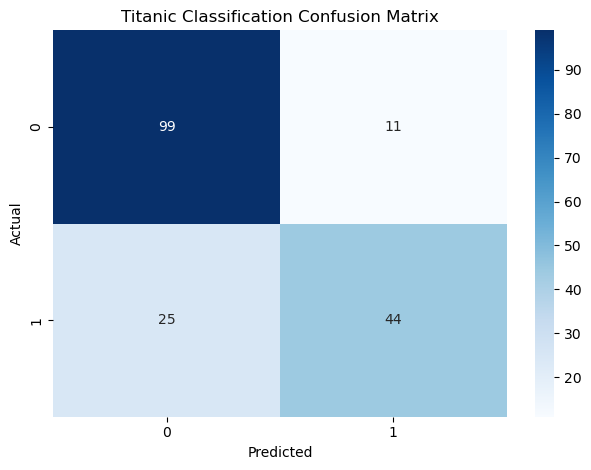

In [27]:
# Enter your code here:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
model.estimator = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

In [29]:
model.param_grid = param_grid
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_s

In [30]:
# Print best parameters and accuracy
print(f"Best Parameters: {model.best_params_}")
print(f"Best Accuracy: {model.best_score_:.4f}")
best_model = model.best_estimator_
best_model

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: 0.8371


RandomForestClassifier(min_samples_split=10)

In [31]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8101
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       110
           1       0.82      0.65      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



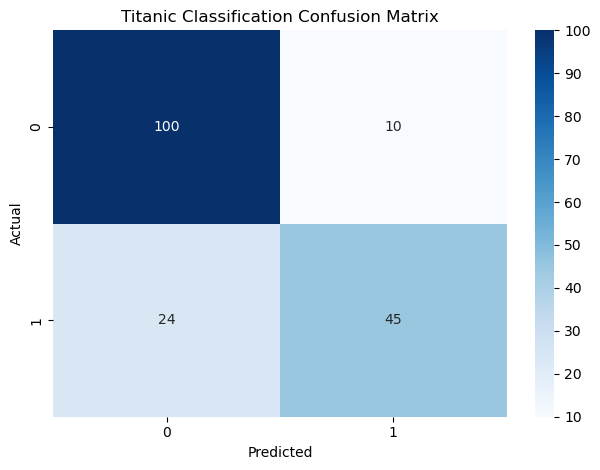

In [32]:
# Enter your code here:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

In [33]:
test_data.head()

,PassengerId,Age,Fare,FamilySize,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,892,0.386231,-0.497811,1,False,True,True,True,False
1,893,1.371370,-0.512660,2,False,True,False,False,True
2,894,2.553537,-0.464532,1,True,False,True,True,False
3,895,-0.204852,-0.482888,1,False,True,True,False,True
4,896,-0.598908,-0.417971,3,False,True,False,False,True


In [36]:
_test_data = test_data.drop(columns=['PassengerId'])
predictions = model.predict(_test_data)

In [37]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
